# 文档结构
- IO
    - 数据文件读写（CSV）

- 全局函数
   - 类
      - Series（一维数据）
      - DataFrame(二维数据)
      - Panel（三维数据）

- 三种数据结构
   - Series（一维列表数据）
   - **DataFrame(二维数据表)**
   - Panel（三维数据集）

- 三种数据的操作
  - index
  - 标量
  - 窗口 / 分组（子数据集/按照字段分类）
  - 采样
  - 图形（plot）
    

# Pandas的编程模式

- 创建或者获取数据集（Series、DataFrame）
   - 使用DataFrame的构造器创建数据集
   - 从文件读取数据集
   - 第三方工具

- 数据集的操作
  - 数据容器的基本操作（curd）
  - 数据操作（处理）
      - 运算符
      - 分组
      - 窗口
  
- 数据可视化


In [13]:
%matplotlib inline
import pandas as pd

#获取、创建数据集
alg = pd.read_csv('job.csv')


#数据集的操作（数据处理：属性+方法）
gp = alg.groupby('job_listed') #按字段分组
ct  =gp.count() #按照分组统计（缺失值也算）
#数据可视化


In [14]:
ct

,job_company,job_education,job_industry,job_location,job_name,job_persons,job_salary,job_time,job_year
job_listed,,,,,,,,,
,15,15,15,15,15,15,15,15,15
A轮,49,49,49,49,49,49,49,49,49
B轮,31,31,31,31,31,31,31,31,31
C轮,33,33,33,33,33,33,33,33,33
D轮及以上,41,41,41,41,41,41,41,41,41
不需要融资,47,47,47,47,47,47,47,47,47
天使轮,14,14,14,14,14,14,14,14,14
已上市,51,51,51,51,51,51,51,51,51
未融资,19,19,19,19,19,19,19,19,19


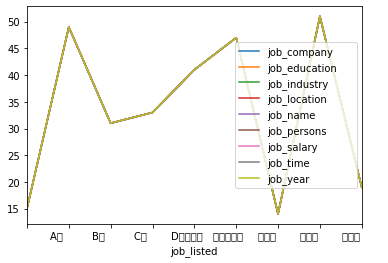

In [17]:
ct.plot()

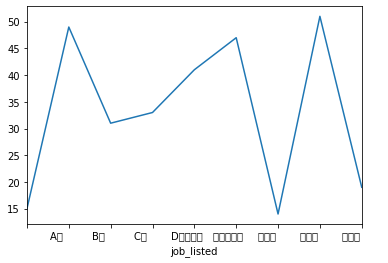

In [18]:
ct = ct['job_company'] #对部分数据取值
ct.plot()

# 数据源
## 使用构造器创建
- 构建器
 data:数据内容（二维）
 
 index：行标签
 
 columns：列标签
 
 ctype：数据类型  numpy的类型
 
 copy：克隆（两个独立控制）与引用（共享数据空间）



In [33]:
import pandas as pd
df = pd.DataFrame(data=[[1,2,3,4],
                       [5,6,7,8]],
                index=['第一行','第二行'] )

In [ ]:
df

In [ ]:
import pandas as pd
df = pd.DataFrame(data=[1,2,3,4]) #一维为一列

- data是字典的情况：
    - 字典：key:value 指定列名
    - 不建议使用colums

In [43]:
import pandas as pd
import numpy
df = pd.DataFrame(
data = {
    '列1':[1,2,3,4],
    '列2':['jack','a','s','f']
},
index=['A','B','c','d'],
dtype=numpy.float) #类型只对能影响的数据改变

In [44]:
df

,列1,列2
A,1.0,jack
B,2.0,a
c,3.0,s
d,4.0,f


## 从文件中读取数据
```python 
    pandas.read_csv(
    sep='', 列的分割符
    header=None, 指定数据从那行作为列名 一般为int或者int的列表
    names 指定列名  
    index_col 行标签  指定第几列作为行名
    no_filter 过滤NAN的行
    usecols 选择要读取的列  指定列名 只显示该列
    na_value NAN的替代值
    squeeze压缩维数
        
    )
```

In [83]:
# import pandas as pd
# fd1 = open('python.csv','r',encoding='utf-8')
# data = pd.read_csv(fd1)
# data = data[0:8]
# fd1.close()
# data

In [55]:
import pandas as pd

data  = pd.read_csv('python.csv',header = [1,2,6])
data[0:2]

,旷视科技,本科,移动互联网,C轮,北京 海淀区 中关村,Python,1000-9999人,20k-30k,发布于昨天,3-5年
,赤骥商贸有限公司,大专,贸易/进出口,未融资,北京 朝阳区 朝外,PYthon,100-499人,12k-24k,发布于昨天,5-10年
,今日头条,本科,移动互联网,D轮及以上,北京 海淀区 中关村,Python,10000人以上,20k-40k,发布于02月14日,3-5年
0,PACTERA,本科,计算机软件,已上市,北京 昌平区 沙河,Python,10000人以上,9k-14k,发布于02月26日,3-5年
1,蚂蚁金服,本科,互联网金融,C轮,北京 朝阳区 朝外,Python,10000人以上,25k-50k,发布于02月18日,3-5年


## 第三方工具
 - 金融数据[股票，电影院]


In [1]:
import tushare
data = tushare.day_boxoffice('')
data

,IRank,MovieName,BoxOffice,SumBoxOffice,AvgPrice,AvpPeoPle,MovieDay,larger_url,default_url,moblie_url,BoxOffice_Up,WomIndex
0,1,诛仙Ⅰ,381,31879,36,1,7,http://images.entgroup.cn/group2/M00/02/90/wKg...,http://images.entgroup.cn/group1/M00/05/1A/wKg...,http://images.entgroup.cn/group1/M00/05/1A/wKg...,-67,
1,2,名侦探柯南：绀青之拳,263,18267,36,1,7,http://images.entgroup.cn/group1/M00/05/1F/wKg...,http://images.entgroup.cn/group1/M00/05/18/wKg...,http://images.entgroup.cn/group1/M00/05/18/wKg...,-49,
2,3,小小的愿望,260,17771,37,1,8,http://images.entgroup.cn/group1/M00/05/1F/wKg...,http://images.entgroup.cn/group2/M00/02/8F/wKg...,http://images.entgroup.cn/group2/M00/02/8F/wKg...,-66,
3,4,罗小黑战记,195,24700,36,1,13,,http://images.entgroup.cn/group2/M00/02/8F/wKg...,http://images.entgroup.cn/group2/M00/02/8F/wKg...,-57,
4,5,速度与激情：特别行动,107,140616,37,1,28,http://images.entgroup.cn/group1/M00/05/13/wKg...,http://images.entgroup.cn/group2/M00/02/8A/wKg...,http://images.entgroup.cn/group2/M00/02/8A/wKg...,-64,
5,6,哪吒之魔童降世,106,490796,35,1,56,http://images.entgroup.cn/group2/M00/02/8B/wKg...,http://images.entgroup.cn/group2/M00/02/8A/wKg...,http://images.entgroup.cn/group2/M00/02/8A/wKg...,-61,
6,7,巨鳄风暴,87,5733,33,1,8,,http://images.entgroup.cn/group1/M00/05/1C/wKg...,http://images.entgroup.cn/group1/M00/05/1C/wKg...,-70,
7,8,决胜时刻,24,206,35,43,0,,http://images.entgroup.cn/group1/M00/05/1E/wKg...,http://images.entgroup.cn/group1/M00/05/1E/wKg...,20,
8,9,古田军号,18,2767,18,5,50,,http://images.entgroup.cn/group1/M00/05/11/wKg...,http://images.entgroup.cn/group1/M00/05/11/wKg...,-64,
9,10,一生只为一事来,18,395,44,11,11,,http://images.entgroup.cn/group1/M00/05/19/wKg...,http://images.entgroup.cn/group2/M00/02/8E/wKg...,6,


In [3]:
df = tushare.get_realtime_quotes('000001')
df

,name,open,pre_close,price,high,low,bid,ask,volume,amount,...,a2_p,a3_v,a3_p,a4_v,a4_p,a5_v,a5_p,date,time,code
0,平安银行,14.480,14.410,14.840,14.890,14.480,14.840,14.850,188402083,2777383508.480,...,14.860,6607,14.870,11382,14.880,15291,14.890,2019-09-19,15:00:03,000001


# 数据处理
## 属性
  - 数据集的形状
    - shape
  - 行标签
     - index
  - 列标签
      - columns
  - values索引
      - 返回data属性
      - ndarray
      - ndarray =》 DataFrame  ---》 ndarry（values）
  - dtype、ftype（稀疏）数据类型
  - ndim （维度）
  
  - axes坐标轴
     
   

In [13]:
import tushare as ts
import pandas as pd
stock = ts.get_hist_data('000005')
job = pd.read_csv('python.csv',usecols=[0,3,4,7])
all_com = ts.get_stock_basics()
job[0:5]
job.shape



(298, 4)

In [30]:
job.index

RangeIndex(start=0, stop=298, step=1)

In [18]:
job.columns

Index(['job_company    ', 'job_listed', 'job_location', 'job_salary'], dtype='object')

In [32]:
stock.columns.names

FrozenList([None])

In [22]:
group = job.groupby(['job_company    ','job_listed'])
ds = group.count()
ds.index.names

FrozenList(['job_company    ', 'job_listed'])

In [23]:
ds

,,job_location,job_salary
job_company,job_listed,,
360企业安全集团,不需要融资,1,1
58到家,B轮,1,1
ADVANCE,B轮,1,1
BoringKillerLtd,天使轮,1,1
Boss直聘,D轮及以上,1,1
...,...,...,...
零点,已上市,1,1
顺智信科技,A轮,1,1
飞翼航空,,1,1


In [34]:
stock.values #矩阵

array([[3.3000000e+00, 3.3400000e+00, 3.3300000e+00, ..., 1.8372548e+05,
        4.1174371e+05, 3.7667608e+05],
       [3.3500000e+00, 3.3600000e+00, 3.3200000e+00, ..., 1.9702400e+05,
        4.9445036e+05, 3.8098340e+05],
       [3.4200000e+00, 3.4300000e+00, 3.3400000e+00, ..., 2.3915778e+05,
        5.7740995e+05, 3.8409346e+05],
       ...,
       [6.5500000e+00, 6.5800000e+00, 6.5100000e+00, ..., 1.2124349e+05,
        1.2124349e+05, 1.2124349e+05],
       [6.6000000e+00, 6.6000000e+00, 6.5500000e+00, ..., 1.4449580e+05,
        1.4449580e+05, 1.4449580e+05],
       [6.5300000e+00, 6.7400000e+00, 6.6400000e+00, ..., 2.0053923e+05,
        2.0053923e+05, 2.0053923e+05]])

In [35]:
stock.axes

[Index(['2019-09-19', '2019-09-18', '2019-09-17', '2019-09-16', '2019-09-12',
        '2019-09-11', '2019-09-10', '2019-09-09', '2019-09-06', '2019-09-05',
        ...
        '2017-04-05', '2017-03-31', '2017-03-30', '2017-03-29', '2017-03-28',
        '2017-03-27', '2017-03-24', '2017-03-23', '2017-03-22', '2017-03-21'],
       dtype='object', name='date', length=613),
 Index(['open', 'high', 'close', 'low', 'volume', 'price_change', 'p_change',
        'ma5', 'ma10', 'ma20', 'v_ma5', 'v_ma10', 'v_ma20'],
       dtype='object')]

## 数据转换
1.astype

2.isan返回一个bool数据集

In [37]:
stock.astype(int)  #除了类型其他的和原来的一样

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,,,
2019-09-19,3,3,3,3,154158,0,0,3,3,3,183725,411743,376676
2019-09-18,3,3,3,3,135574,0,0,3,3,3,197024,494450,380983
2019-09-17,3,3,3,3,208744,0,-2,3,3,3,239157,577409,384093
2019-09-16,3,3,3,3,232361,0,-2,3,3,3,290137,568564,386281
2019-09-12,3,3,3,3,187789,0,0,3,3,3,386422,560821,376852
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-03-27,6,6,6,6,62514,0,0,6,6,6,95688,95688,95688
2017-03-24,6,6,6,6,52195,0,0,6,6,6,103981,103981,103981
2017-03-23,6,6,6,6,74738,0,0,6,6,6,121243,121243,121243


In [38]:
stock.isna()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,,,
2019-09-19,False,False,False,False,False,False,False,False,False,False,False,False,False
2019-09-18,False,False,False,False,False,False,False,False,False,False,False,False,False
2019-09-17,False,False,False,False,False,False,False,False,False,False,False,False,False
2019-09-16,False,False,False,False,False,False,False,False,False,False,False,False,False
2019-09-12,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-03-27,False,False,False,False,False,False,False,False,False,False,False,False,False
2017-03-24,False,False,False,False,False,False,False,False,False,False,False,False,False
2017-03-23,False,False,False,False,False,False,False,False,False,False,False,False,False


## 索引和迭代
### 列迭代
- 函数和方法（返回数据集）

    字符串或者字符串列表
        - 访问列或者多列
    
    切片
        - 访问行
- 下标运算

In [39]:
job['job_listed']

0      C轮        
1      未融资       
2      已上市       
3      不需要融资     
4      不需要融资     
          ...    
293    A轮        
294    B轮        
295    A轮        
296    A轮        
297    不需要融资     
Name: job_listed, Length: 298, dtype: object

In [46]:
job[['job_listed','job_company    ']]

,job_listed,job_company
0,C轮,旷视科技
1,未融资,赤骥商贸有限公司
2,已上市,传智播客
3,不需要融资,佰钧成技术
4,不需要融资,iHandy
...,...,...
293,A轮,一览群智
294,B轮,来也
295,A轮,彩云科技
296,A轮,必示科技


### 行的迭代
- 
- 返回迭代器(索引器) ==》支持下标的属性
- 行标签下标
  - loc 下标指定的是标签
- 行的位置下标
    - lioc 下标指定的是整数：位置

In [49]:
import pandas as pd 
data = pd.DataFrame(
data = {
    '列1':[1,2,3],
    '列2':['a','b','v']
    
},index = ['第一行','第二行','第三行'])
data

,列1,列2
第一行,1,a
第二行,2,b
第三行,3,v


In [51]:
data.loc['第一行']  #标签名

列1    1
列2    a
Name: 第一行, dtype: object

In [41]:
job.iloc[1]

job_company        赤骥商贸有限公司       
job_listed              未融资       
job_location          北京 朝阳区 朝外   
job_salary              12k-24k   
Name: 1, dtype: object

In [42]:
job.loc[1]
job.loc[:3]
job.loc[True,False,True] #长度不匹配默认是F

job_company        赤骥商贸有限公司       
job_listed              未融资       
job_location          北京 朝阳区 朝外   
job_salary              12k-24k   
Name: 1, dtype: object

In [52]:
job[0:4]

,job_company,job_listed,job_location,job_salary
0,旷视科技,C轮,北京 海淀区 中关村,20k-30k
1,赤骥商贸有限公司,未融资,北京 朝阳区 朝外,12k-24k
2,传智播客,已上市,北京 昌平区 回龙观,25k-35k
3,佰钧成技术,不需要融资,北京 朝阳区 望京,12k-19k


## 单元格迭代
1.at列的标签
 - 参数值对
 - at【'行索引','列'】
2 .iat单元格的位置迭代-位置
 - 可修改值


In [54]:
data.at['第一行','列1']

1

In [57]:
data.iat[0,0] = '100'

In [58]:
data

,列1,列2
第一行,100,a
第二行,2,b
第三行,3,v


2.lookup
- 可多单元格
- 参数必须是标签

In [93]:
job.lookup(row_labels=[0,0,0],col_labels=['job_listed','job_location','job_salary']) #这里0是行标签

array(['C轮        ', '北京 海淀区 中关村  ', '20k-30k   '], dtype=object)

## 条件迭代
    - where（条件）
    - query（表达式）
    - mask（过滤）
1.where
```python

    DataFrame.where(
        cond:返回bool
        level：多索引情况下的层数
        other:不满足条件的值
    )
```

In [62]:
stock.where(stock['open']>=4.0,other=0)

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,,,
2019-09-19,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000,0.000,0.000,0.00,0.00,0.00
2019-09-18,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000,0.000,0.000,0.00,0.00,0.00
2019-09-17,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000,0.000,0.000,0.00,0.00,0.00
2019-09-16,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000,0.000,0.000,0.00,0.00,0.00
2019-09-12,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000,0.000,0.000,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-03-27,6.53,6.53,6.48,6.47,62514.65,-0.05,-0.77,6.542,6.542,6.542,95688.15,95688.15,95688.15
2017-03-24,6.52,6.53,6.53,6.47,52195.62,0.02,0.31,6.558,6.558,6.558,103981.52,103981.52,103981.52
2017-03-23,6.55,6.58,6.51,6.47,74738.87,-0.04,-0.61,6.567,6.567,6.567,121243.49,121243.49,121243.49


2.query
```python
    DataFrame.query(
        
    )
```

In [66]:
job[1:9]

,job_company,job_listed,job_location,job_salary
1,赤骥商贸有限公司,未融资,北京 朝阳区 朝外,12k-24k
2,传智播客,已上市,北京 昌平区 回龙观,25k-35k
3,佰钧成技术,不需要融资,北京 朝阳区 望京,12k-19k
4,iHandy,不需要融资,北京 海淀区 五道口,25k-50k
5,今日头条,D轮及以上,北京 海淀区 中关村,20k-40k
6,PACTERA,已上市,北京 昌平区 沙河,9k-14k
7,蚂蚁金服,C轮,北京 朝阳区 朝外,25k-50k
8,BoringKillerLtd,天使轮,北京 海淀区 万寿路,20k-25k


In [73]:
job.query('job_listed == "C轮" and "朝阳" in job_location')

,job_company,job_listed,job_location,job_salary


2.MASK
```python
    DataFrame.mask(
        
    )
```
与where相反

In [74]:
job.keys() #返回所有列

Index(['job_company    ', 'job_listed', 'job_location', 'job_salary'], dtype='object')

In [76]:
job.columns

Index(['job_company    ', 'job_listed', 'job_location', 'job_salary'], dtype='object')

In [77]:
job.items()

<generator object DataFrame.items at 0x000002B8DA7D6048>

In [78]:
for item in job.iteritems():#列数据
    print(item)

('job_company    ', 0      旷视科技           
1      赤骥商贸有限公司       
2      传智播客           
3      佰钧成技术          
4      iHandy         
            ...       
293    一览群智           
294    来也             
295    彩云科技           
296    必示科技           
297    便利蜂            
Name: job_company    , Length: 298, dtype: object)
('job_listed', 0      C轮        
1      未融资       
2      已上市       
3      不需要融资     
4      不需要融资     
          ...    
293    A轮        
294    B轮        
295    A轮        
296    A轮        
297    不需要融资     
Name: job_listed, Length: 298, dtype: object)
('job_location', 0      北京 海淀区 中关村  
1      北京 朝阳区 朝外   
2      北京 昌平区 回龙观  
3      北京 朝阳区 望京   
4      北京 海淀区 五道口  
           ...     
293    北京 海淀区 苏州桥  
294    北京 海淀区 中关村  
295    北京 海淀区 学院路  
296    北京 海淀区 五道口  
297    北京 朝阳区 太阳宫  
Name: job_location, Length: 298, dtype: object)
('job_salary', 0      20k-30k   
1      12k-24k   
2      25k-35k   
3      12k-19k   
4      25k-50k   
          ...    
293    15

In [79]:
for item in job.iterrows():#行数据
    print(item)

(0, job_company        旷视科技           
job_listed              C轮        
job_location          北京 海淀区 中关村  
job_salary              20k-30k   
Name: 0, dtype: object)
(1, job_company        赤骥商贸有限公司       
job_listed              未融资       
job_location          北京 朝阳区 朝外   
job_salary              12k-24k   
Name: 1, dtype: object)
(2, job_company        传智播客           
job_listed              已上市       
job_location          北京 昌平区 回龙观  
job_salary              25k-35k   
Name: 2, dtype: object)
(3, job_company        佰钧成技术          
job_listed              不需要融资     
job_location          北京 朝阳区 望京   
job_salary              12k-19k   
Name: 3, dtype: object)
(4, job_company        iHandy         
job_listed              不需要融资     
job_location          北京 海淀区 五道口  
job_salary              25k-50k   
Name: 4, dtype: object)
(5, job_company        今日头条           
job_listed              D轮及以上     
job_location          北京 海淀区 中关村  
job_salary              20k-40k   
Name: 5, dtype: 

Name: 274, dtype: object)
(275, job_company        文思海辉           
job_listed              已上市       
job_location          北京 海淀区 万柳   
job_salary              8k-10k    
Name: 275, dtype: object)
(276, job_company        奇虎360          
job_listed              已上市       
job_location          北京 朝阳区 酒仙桥  
job_salary              40k-80k   
Name: 276, dtype: object)
(277, job_company        旷视科技           
job_listed              C轮        
job_location          北京 海淀区 中关村  
job_salary              18k-30k   
Name: 277, dtype: object)
(278, job_company        冠川智能           
job_listed              未融资       
job_location          北京 顺义区 后沙峪  
job_salary              3k-6k     
Name: 278, dtype: object)
(279, job_company        北京太极华保科技...    
job_listed                        
job_location          北京 海淀区 万柳   
job_salary              15k-30k   
Name: 279, dtype: object)
(280, job_company        iHandy         
job_listed              不需要融资     
job_location          北京 海淀区 学院路  
job

4.xs函数
   - 等同loc
   - 使用方式
```python
    
    DataFrame.xs(
        key, # 行列的标签名      
        axis=0 # 行0  列1
        
    )
```

In [81]:
job.xs(1)

job_company        赤骥商贸有限公司       
job_listed              未融资       
job_location          北京 朝阳区 朝外   
job_salary              12k-24k   
Name: 1, dtype: object

## 运算符
和numpy运算差不多
用来计算的话建议用values转化为ndarray来计算  


In [82]:
import pandas as pd
x = pd.DataFrame(
data=[1,2,3])

y = pd.DataFrame(data=[4,5,6])

x+y

,0
0,5
1,7
2,9


- 合并


In [86]:
def func(f1,f2):
    print(f1,f2,'----')
    return f1
    

In [87]:
x.combine(y,func)

0    1
1    2
2    3
Name: 0, dtype: int64 0    4
1    5
2    6
Name: 0, dtype: int64 ----


,0
0,1
1,2
2,3


## 定制处理、分组处理、滑动窗口


###  apply定制处理
  - apply ：行顶
  - applymap : 单元格
  - pipe : 数据集

- 调用机制一样，数据密度不一样

In [97]:
import pandas as pd
#apply
data = pd.DataFrame(data = [
    [1,2,3],
    [4,5,6]
])

def data_handle(row):
    print(row)
    return row
data.apply(func=data_handle,axis=1) #0按列处理，1行处理


0    1
1    2
2    3
Name: 0, dtype: int64
0    1
1    2
2    3
Name: 0, dtype: int64
0    4
1    5
2    6
Name: 1, dtype: int64


,0,1,2
0,1,2,3
1,4,5,6


In [101]:
import pandas as pd
#applymap
data = pd.DataFrame(data = [
    [1,2,3],
    [4,5,6]
])

def data_handle(row,*args,**kwargs):
    print(row)
    print(kwargs)
    return row  #返回的数据可自己定义
data.pipe(func=data_handle,p1 = 'hello') #默认按列处理

   0  1  2
0  1  2  3
1  4  5  6
{'p1': 'hello'}


,0,1,2
0,1,2,3
1,4,5,6


### 数据聚合的处理

In [102]:
import pandas as pd 
data = pd.DataFrame(data = [
    [1,2,3],
    [4,5,6]
])

data.agg(['sum','std']) #字符串来自：numpy内的聚合函数

,0,1,2
sum,5.00000,7.00000,9.00000
std,2.12132,2.12132,2.12132


### 分组
- 先分组再聚合
- 用列名分组

```python 
    DataFrame.groupby(
        by :分组条件
        axis
        as_index =True :是否用分组列的值作为行的索引
        sort 排序
        group_keys #组片段标识
    )
```

1.标签分组

In [2]:
import pandas as pd

job = pd.read_csv('alg.csv',usecols=['job_company','job_industry','job_listed','job_salary'])
job[0:5]

,job_company,job_industry,job_listed,job_salary
0,跨越新科技,互联网,未融资,25k-40k
1,水滴筹,移动互联网,B轮,25k-50k
2,蚂蚁金服,互联网,C轮,30k-60k
3,安居客,互联网,已上市,20k-40k
4,京东世纪贸易有限公司,互联网,已上市,25k-50k


### 分组对象的使用


In [4]:
# item遍历
gr = job.groupby(by='job_listed')
for i in gr:
    i

In [6]:
i

('未融资       ',      job_company  job_industry  job_listed  job_salary
 0    跨越新科技        互联网           未融资         25k-40k   
 12   同方威视         企业服务          未融资         14k-15k   
 16   直真科技         计算机软件         未融资         20k-30k   
 23   北京千喜鹤        生活服务          未融资         25k-35k   
 25   丽晶美成         咨询            未融资         25k-50k   
 38   随行付金科        互联网金融         未融资         25k-40k   
 54   恒润科技         其他行业          未融资         10k-15k   
 78   创奇视界         计算机软件         未融资         18k-25k   
 111  同方威视         企业服务          未融资         14k-22k   
 117  缙铖医疗         医疗设备/器械       未融资         15k-30k   
 130  鑫瑞天翔         信息安全          未融资         35k-50k   
 147  随行付金科        互联网金融         未融资         20k-30k   
 155  丽晶美成         咨询            未融资         35k-60k   
 181  勤天美信         智能硬件          未融资         20k-40k   
 208  象心力科技        新能源           未融资         12k-22k   
 221  欣途峰          通信/网络设备       未融资         20k-25k   
 259  缙铖医疗         医疗设备/器械       未

In [7]:

gr.groups  #字典：{key【分组名】：values【数据的行索引】}


{'          ': Int64Index([65, 102, 112, 121, 141, 158, 177, 188, 216, 237, 243, 268, 279,
             293, 296],
            dtype='int64'),
 'A轮        ': Int64Index([ 39,  43,  44,  48,  81,  98, 103, 104, 106, 110, 113, 134, 152,
             165, 167, 168, 173, 189, 195, 196, 197, 203, 204, 206, 212, 213,
             225, 232, 236, 239, 240, 242, 245, 250, 251, 253, 255, 263, 267,
             270, 273, 274, 276, 277, 282, 283, 291, 292, 298],
            dtype='int64'),
 'B轮        ': Int64Index([  1,  17,  19,  29,  47,  51,  58,  73,  75,  85, 120, 126, 129,
             135, 144, 150, 161, 169, 176, 180, 183, 186, 210, 226, 228, 230,
             256, 262, 284, 285, 299],
            dtype='int64'),
 'C轮        ': Int64Index([  2,   9,  18,  22,  28,  33,  41,  55,  60,  62,  66,  72,  87,
              93, 118, 122, 131, 137, 140, 156, 157, 174, 178, 187, 190, 201,
             211, 214, 218, 252, 269, 281, 288],
            dtype='int64'),
 'D轮及以上     ': Int64Index([  5,  

In [8]:
gr.indices  #本质与groups属性一样  values是indarry类型

{'          ': array([ 65, 102, 112, 121, 141, 158, 177, 188, 216, 237, 243, 268, 279,
        293, 296], dtype=int64),
 'A轮        ': array([ 39,  43,  44,  48,  81,  98, 103, 104, 106, 110, 113, 134, 152,
        165, 167, 168, 173, 189, 195, 196, 197, 203, 204, 206, 212, 213,
        225, 232, 236, 239, 240, 242, 245, 250, 251, 253, 255, 263, 267,
        270, 273, 274, 276, 277, 282, 283, 291, 292, 298], dtype=int64),
 'B轮        ': array([  1,  17,  19,  29,  47,  51,  58,  73,  75,  85, 120, 126, 129,
        135, 144, 150, 161, 169, 176, 180, 183, 186, 210, 226, 228, 230,
        256, 262, 284, 285, 299], dtype=int64),
 'C轮        ': array([  2,   9,  18,  22,  28,  33,  41,  55,  60,  62,  66,  72,  87,
         93, 118, 122, 131, 137, 140, 156, 157, 174, 178, 187, 190, 201,
        211, 214, 218, 252, 269, 281, 288], dtype=int64),
 'D轮及以上     ': array([  5,   6,   7,   8,  10,  13,  14,  20,  21,  26,  30,  31,  34,
         35,  37,  49,  63,  64,  68,  70,  71,  80,  84,  92

2.多字段的分组
    - 多字段作为索引


In [39]:
import tushare as ts
import pandas as pd

data = ts.get_stock_basics()

data

,name,industry,area,pe,outstanding,totals,totalAssets,liquidAssets,fixedAssets,reserved,...,bvps,pb,timeToMarket,undp,perundp,rev,profit,gpr,npr,holders
code,,,,,,,,,,,,,,,,,,,,,
300790,N宇瞳,电器仪表,广东,35.50,0.29,1.14,13.27,5.87,4.77,2.98,...,9.89,2.64,20190920,2.50,2.19,0.00,0.00,22.61,8.27,57875.0
600495,晋西车轴,运输设备,山西,304.44,12.08,12.08,38.50,21.86,11.70,11.60,...,2.60,1.85,20040526,5.70,0.47,-9.02,-64.87,14.74,1.90,119437.0
603528,多伦科技,软件服务,江苏,32.92,6.22,6.27,20.69,16.52,1.58,1.99,...,2.43,3.42,20160503,5.82,0.93,9.89,3.47,55.99,25.76,30710.0
300150,世纪瑞尔,软件服务,北京,0.00,4.72,5.85,22.42,13.90,0.56,10.82,...,3.28,1.40,20101222,1.71,0.29,21.37,-112.31,41.80,-4.88,32165.0
002660,茂硕电源,电气设备,深圳,77.08,2.05,2.74,14.08,7.87,3.96,4.11,...,2.08,4.47,20120316,-1.39,-0.51,-14.25,603.72,21.12,3.08,30000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300028,金亚科技,通信设备,四川,0.00,3.44,3.44,2.06,0.33,1.06,3.63,...,0.39,0.00,20091030,-5.73,-1.66,-89.14,-140.59,-166.98,-1206.40,44901.0
002963,豪尔赛,装修装饰,北京,0.00,0.00,0.00,13.20,12.90,0.15,2.64,...,0.00,0.00,0,3.56,0.00,0.00,0.00,41.43,22.69,0.0
002680,*ST长生,生物制药,江苏,0.00,5.81,9.74,43.84,30.16,4.34,10.39,...,3.85,0.00,20120605,17.07,1.75,9.31,-4.61,90.32,36.62,24817.0


In [16]:
data_gr = data.groupby(by=['industry','area'])
len(data_gr)

1331

In [17]:
re = data_gr.mean()
re

pe  outstanding     totals  totalAssets  liquidAssets  \
industry area                                                                   
IT设备     上海       21.80000     11.52000   11.99000     58.67500      30.76000   
         北京       69.90375      9.27625   10.27375    126.46125      76.24875   
         四川        0.00000     13.49000   13.78000     34.02000      20.99000   
         天津     2102.43500      5.34500    6.50000     97.00000      63.45500   
         山东       48.04500      9.67500    9.77500    138.92500     115.82000   
...                    ...          ...        ...          ...           ...   
黄金       山东      943.53000      8.36000   10.62200    132.28000      39.79400   
         新疆    37784.25000      6.36000    6.36000     27.76000       9.46000   
         湖南       67.30000     12.02000   12.02000     70.36000      16.98000   
         甘肃        0.00000     10.77500   10.77500     59.85500      52.34500   
         福建       21.75000    168.76000  230.31000   1165.82000     299.05000   

               fixedAssets  reserved  reservedPerShare       esp     bvps  \
industry area                                                               
IT设备     上海       19.23500    4.2100           1.05000  0.069000  2.70500   
         北京        7.12125   19.9825           3.56625  0.240125  6.00875   
         四川        1.80000   28.4000           2.06000 -0.046000  2.29000   
         天津        8.52500   11.5500           1.88000  0.113500  4.14000   
         山东        9.10500   26.7650           2.43500  0.223000  5.62500   
...                    ...       ...               ...       ...      ...   
黄金       山东       48.64800   19.4960           1.33800  0.066400  2.75800   
         新疆       11.70000    5.0800           0.80000  0.000000  2.63000   
         湖南       28.67000   12.9100           1.07000  0.070000  4.07000   
         甘肃        3.66500   15.6050           1.14000 -0.097500  2.08500   
         福建      354.73000  109.8900           0.48000  0.080000  1.56000   

                    pb  timeToMarket      undp  perundp        rev     profit  \
industry area                                                                   
IT设备     上海     4.1650  2.003591e+07    3.0650  0.82000    0.45000  -33.82500   
         北京     3.1225  2.010416e+07   17.4925  1.35375   -6.91125   54.44625   
         四川     1.7400  2.009120e+07  -10.8100 -0.78000    9.38000   51.33000   
         天津     5.9000  2.015601e+07    8.2250  1.15000   -4.14000  -29.83500   
         山东     3.6200  2.005047e+07   18.2350  1.88000   -1.30500   14.39500   
...                ...           ...       ...      ...        ...        ...   
黄金       山东    15.0620  2.000268e+07   25.0600  0.30600    1.29600   -6.09800   
         新疆     6.1900  2.015012e+07    4.4900  0.71000  230.85000  100.95000   
         湖南     2.3100  2.007082e+07   21.0600  1.75000   27.58000  -39.17000   
         甘肃     2.3300  1.997087e+07   -0.3400 -0.12500  -60.57000 -136.62500   
         福建     2.2400  2.008042e+07  217.6400  0.94000   34.90000  -26.64000   

                    gpr       npr   holders  
industry area                                
IT设备     上海    38.32000   4.98000  116239.0  
         北京    35.82875   9.80125   57178.0  
         四川    10.12000 -16.76000   90000.0  
         天津    23.89500   2.30000   86884.0  
         山东    23.76500   8.61000   91145.5  
...                 ...       ...       ...  
黄金       山东    31.60400 -49.59200   67580.6  
         新疆     9.35000   0.01000   69725.0  
         湖南     6.31000   1.00000  105192.0  
         甘肃   -35.35000 -77.37500   67880.5  
         福建    11.24000   2.76000  693997.0  

[1331 rows x 19 columns]

3.字典分组
    - 手工分组
        - 字典的意义说明：{key(原来数据的索引)：values（划归的组）}


In [41]:
import pandas as pd
alg = pd.read_csv('alg.csv')

data_gr2 = alg[['job_company','job_listed']]
data_gr2
gr2 = data_gr2.groupby(by={
    0:'第一组',
    1:'第一组',
    2:'第二组',
    3:'第二组',
    5:'第四组'
})

for i in gr2:
    print(i)

('第一组',    job_company  job_listed
0  跨越新科技        未融资       
1  水滴筹          B轮        )
('第二组',    job_company  job_listed
2  蚂蚁金服         C轮        
3  安居客          已上市       )
('第四组',    job_company  job_listed
5  今日头条         D轮及以上     )


In [42]:
gr2.count()

,job_company,job_listed
第一组,2,2
第二组,2,2
第四组,1,1


4.使用函数

In [43]:
import pandas as pd
alg = pd.read_csv('alg.csv')

data_gr2 = alg[['job_company','job_listed']]

def group_index(idx): #实现分组规则
    if idx % 2 ==0:
        return 'A'
    else:
        return 'B'

gr3 = alg.groupby(by =group_index)
gr3.count()

,job_company,job_education,job_industry,job_listed,job_location,job_name,job_persons,job_salary,job_time,job_year
A,150,150,150,150,150,150,150,150,150,150
B,150,150,150,150,150,150,150,150,150,150


### 数据处理
1.定制处理

In [12]:
def group_handle(g):  #每一组调用一次
    print(type(g))
    return {'a':88}


# re = gr.apply(group_handle)
import numpy as np

re = gr.aggregate(np.sum)


re




,job_company,job_industry,job_salary
job_listed,,,
,落角 落角 北京爱欣文化发展...恒亚通 北京...,电子商务 电子商务 培训机构 企业服务 ...,30k-60k 30k-60k 28k-40k 20k-35k 28k-40...
A轮,泛阿网络 华清科盛 锋巢信息 泛阿网络 百科...,互联网 智能硬件 互联网 互联网 ...,20k-35k 25k-35k 25k-50k 27k-40k 18k-30...
B轮,水滴筹 58到家 水滴筹 瑞幸咖啡 魔力...,移动互联网 互联网 移动互联网 互联网 ...,25k-50k 23k-35k 25k-50k 30k-40k 40k-60...
C轮,蚂蚁金服 云校 茂逊 旷视科技 蛋壳...,互联网 互联网 电子商务 移动互联网 ...,30k-60k 25k-50k 15k-30k 20k-40k 30k-60...
D轮及以上,今日头条 VIPKID 饿了么 Boss直聘 马蜂...,移动互联网 移动互联网 O2O 人力资源服务 ...,15k-30k 30k-60k 25k-50k 80k-110k 25k-50...
不需要融资,微软中国 物联顺通 去哪儿 华为 思源...,计算机软件 物流/仓储 互联网 计算机软件 ...,20k-40k 20k-40k 20k-40k 25k-40k 30k-50...
天使轮,大汉正源 青萌数海科技 精诊科技 爱医声 鑫互...,电子/半导体/集成电路 数据服务 医疗健康 计算机软件 ...,20k-40k 15k-25k 15k-30k 15k-30k 30k-40...
已上市,安居客 京东世纪贸易有限公司 当当 三一集团 58...,互联网 互联网 移动互联网 其他行业 ...,20k-40k 25k-50k 25k-50k 50k-80k 30k-50...
未融资,跨越新科技 同方威视 直真科技 北京千喜鹤 丽晶...,互联网 企业服务 计算机软件 生活服务 ...,25k-40k 14k-15k 20k-30k 25k-35k 25k-50...


2.聚合处理（max，min，std，var，mean，mediam）
    - 常见的聚合处理（都是数据库的sql语句）
    

### 滑动窗口
```
 DataFrame.rolling(
     window, #整数行
     min_periods #对NAN的计算方式
     center
     win_type 数据从锚点开始的计算方式由窗口类型决定
     on 指定不参与运算的列
     
 )
```

In [3]:
import pandas as pd

data = pd.read_csv('alg.csv')

win = data.rolling(window=3)
win

Rolling [window=3,center=False,axis=0]

In [9]:
import numpy as np
data  = pd.DataFrame(
data = {
    '列1':[1,2,3,np.nan,4,5],
    '列2':[1,2,3,np.nan,np.nan,5]
})

win = data.rolling(3,min_periods=2,on='列2')  #窗口为3  从一开始到三不变  然后min_periods指定数据多少为可用数据  on指定列不参与运算
win.sum()

,列1,列2
0,NaN,1.0
1,3.0,2.0
2,6.0,3.0
3,5.0,NaN
4,7.0,NaN
5,9.0,5.0


行与列的标签

In [10]:
data = pd.read_csv('alg.csv')
data.add_prefix('xxxx')  #加前缀


,xxxxjob_company,xxxxjob_education,xxxxjob_industry,xxxxjob_listed,xxxxjob_location,xxxxjob_name,xxxxjob_persons,xxxxjob_salary,xxxxjob_time,xxxxjob_year
0,跨越新科技,本科,互联网,未融资,北京 朝阳区 酒仙桥,算法工程师,10000人以上,25k-40k,发布于11:54,3-5年
1,水滴筹,本科,移动互联网,B轮,北京 朝阳区 望京,算法工程师,1000-9999人,25k-50k,发布于02月25日,3-5年
2,蚂蚁金服,本科,互联网,C轮,北京 朝阳区 呼家楼,算法工程师/专家,10000人以上,30k-60k,发布于14:36,经验不限
3,安居客,本科,互联网,已上市,北京 朝阳区 酒仙桥,广告算法工程师,10000人以上,20k-40k,发布于02月25日,1-3年
4,京东世纪贸易有限公司,本科,互联网,已上市,北京 朝阳区 小营,算法工程师,10000人以上,25k-50k,发布于02月20日,5-10年
...,...,...,...,...,...,...,...,...,...,...
295,京东数字科技,硕士,互联网,不需要融资,北京,算法工程师,1000-9999人,30k-50k,发布于02月20日,3-5年
296,举人在线,硕士,移动互联网,,北京 朝阳区 朝外,高级路径规划与决策算法工程师,100-499人,35k-60k,发布于02月20日,经验不限
297,智慧足迹,硕士,数据服务,不需要融资,北京 西城区 西单,算法工程师（机器学习）,20-99人,15k-30k,发布于02月15日,1-3年
298,减脂时代,硕士,移动互联网,A轮,北京 朝阳区 望京,三维重建算法工程师,20-99人,20k-40k,发布于02月14日,经验不限


In [11]:
data.set_index('job_industry') #改变索引

,job_company,job_education,job_listed,job_location,job_name,job_persons,job_salary,job_time,job_year
job_industry,,,,,,,,,
互联网,跨越新科技,本科,未融资,北京 朝阳区 酒仙桥,算法工程师,10000人以上,25k-40k,发布于11:54,3-5年
移动互联网,水滴筹,本科,B轮,北京 朝阳区 望京,算法工程师,1000-9999人,25k-50k,发布于02月25日,3-5年
互联网,蚂蚁金服,本科,C轮,北京 朝阳区 呼家楼,算法工程师/专家,10000人以上,30k-60k,发布于14:36,经验不限
互联网,安居客,本科,已上市,北京 朝阳区 酒仙桥,广告算法工程师,10000人以上,20k-40k,发布于02月25日,1-3年
互联网,京东世纪贸易有限公司,本科,已上市,北京 朝阳区 小营,算法工程师,10000人以上,25k-50k,发布于02月20日,5-10年
...,...,...,...,...,...,...,...,...,...
互联网,京东数字科技,硕士,不需要融资,北京,算法工程师,1000-9999人,30k-50k,发布于02月20日,3-5年
移动互联网,举人在线,硕士,,北京 朝阳区 朝外,高级路径规划与决策算法工程师,100-499人,35k-60k,发布于02月20日,经验不限
数据服务,智慧足迹,硕士,不需要融资,北京 西城区 西单,算法工程师（机器学习）,20-99人,15k-30k,发布于02月15日,1-3年


In [15]:
data = pd.read_csv('alg.csv',usecols=['job_listed','job_location','job_persons'])
data.set_axis(['A','B','C'],axis=1,inplace=False)

,A,B,C
0,未融资,北京 朝阳区 酒仙桥,10000人以上
1,B轮,北京 朝阳区 望京,1000-9999人
2,C轮,北京 朝阳区 呼家楼,10000人以上
3,已上市,北京 朝阳区 酒仙桥,10000人以上
4,已上市,北京 朝阳区 小营,10000人以上
...,...,...,...
295,不需要融资,北京,1000-9999人
296,,北京 朝阳区 朝外,100-499人
297,不需要融资,北京 西城区 西单,20-99人
298,A轮,北京 朝阳区 望京,20-99人


In [16]:
data[0:2].rename(index={0:'row1',1:'row2'},columns={'job_listed':'l','job_location':'c','job_persons':'p'})#index旧的标签名 value新的标签名

,l,c,p
row1,未融资,北京 朝阳区 酒仙桥,10000人以上
row2,B轮,北京 朝阳区 望京,1000-9999人


In [18]:
def mapper(lbl_name):
    return '<'+str(lbl_name)+'>'

data[0:3].rename(index=mapper)
    

,job_listed,job_location,job_persons
<0>,未融资,北京 朝阳区 酒仙桥,10000人以上
<1>,B轮,北京 朝阳区 望京,1000-9999人
<2>,C轮,北京 朝阳区 呼家楼,10000人以上


In [21]:
data[0:23].reindex(index=[0,2,3],columns=['job_listed','B']) #构建新的的数据集，再远数据集内取数据，取不到为Nan

,job_listed,B
0,未融资,NaN
2,C轮,NaN
3,已上市,NaN


In [20]:
data.reindex(labels=[0,5],axis=0) #数据过滤

,job_listed,job_location,job_persons
0,未融资,北京 朝阳区 酒仙桥,10000人以上
5,D轮及以上,北京 海淀区 中关村,10000人以上


In [30]:
# data.filter(items=[0,1,2],axis=0)
# data.filter(like='1',axis=0)
data.filter(regex='\d\d',axis=0)

,job_listed,job_location,job_persons
10,D轮及以上,北京 朝阳区 酒仙桥,1000-9999人
11,已上市,北京 朝阳区 西坝河,1000-9999人
12,未融资,北京 海淀区 五道口,1000-9999人
13,D轮及以上,北京 海淀区 中关村,10000人以上
14,D轮及以上,北京 朝阳区 酒仙桥,500-999人
...,...,...,...
295,不需要融资,北京,1000-9999人
296,,北京 朝阳区 朝外,100-499人
297,不需要融资,北京 西城区 西单,20-99人
298,A轮,北京 朝阳区 望京,20-99人


In [36]:
data.drop(index=[0,1],axis=0)

,job_listed,job_location,job_persons
2,C轮,北京 朝阳区 呼家楼,10000人以上
3,已上市,北京 朝阳区 酒仙桥,10000人以上
4,已上市,北京 朝阳区 小营,10000人以上
5,D轮及以上,北京 海淀区 中关村,10000人以上
6,D轮及以上,北京 西城区 什刹海,10000人以上
...,...,...,...
295,不需要融资,北京,1000-9999人
296,,北京 朝阳区 朝外,100-499人
297,不需要融资,北京 西城区 西单,20-99人
298,A轮,北京 朝阳区 望京,20-99人


In [35]:
data.drop_duplicates('job_listed') #删除重复的


,job_listed,job_location,job_persons
0,未融资,北京 朝阳区 酒仙桥,10000人以上
1,B轮,北京 朝阳区 望京,1000-9999人
2,C轮,北京 朝阳区 呼家楼,10000人以上
3,已上市,北京 朝阳区 酒仙桥,10000人以上
5,D轮及以上,北京 海淀区 中关村,10000人以上
36,不需要融资,北京 海淀区 中关村,10000人以上
39,A轮,北京 朝阳区 小关,100-499人
65,,北京 海淀区 中关村,100-499人
79,天使轮,北京 昌平区 天通苑,0-20人


In [39]:
data[0:10].duplicated('job_listed') #返回重复的  不重复为Tru'e

0    False
1    False
2    False
3    False
4     True
5    False
6     True
7     True
8     True
9     True
dtype: bool

### 缺失数据的处理[NAN]
- numu.nan

- 数据预处理

- 缺失值的判定
    - 删除
        - dropnan
    - 一致替换
        - fillnan
    - 个性化替换
        - replacr
    - 利用周围信息替换
        - interplolate

In [4]:
import pandas as pd
data = pd.read_csv('alg.csv')
# data.isna()
data.dropna()  #(axis 删除有nan的行或者列   how：any一个nan就删  all 全部为nan删  thresh指定非空值几个才删除  subset指定列 )

,job_company,job_education,job_industry,job_listed,job_location,job_name,job_persons,job_salary,job_time,job_year
0,跨越新科技,本科,互联网,未融资,北京 朝阳区 酒仙桥,算法工程师,10000人以上,25k-40k,发布于11:54,3-5年
1,水滴筹,本科,移动互联网,B轮,北京 朝阳区 望京,算法工程师,1000-9999人,25k-50k,发布于02月25日,3-5年
2,蚂蚁金服,本科,互联网,C轮,北京 朝阳区 呼家楼,算法工程师/专家,10000人以上,30k-60k,发布于14:36,经验不限
3,安居客,本科,互联网,已上市,北京 朝阳区 酒仙桥,广告算法工程师,10000人以上,20k-40k,发布于02月25日,1-3年
4,京东世纪贸易有限公司,本科,互联网,已上市,北京 朝阳区 小营,算法工程师,10000人以上,25k-50k,发布于02月20日,5-10年
...,...,...,...,...,...,...,...,...,...,...
295,京东数字科技,硕士,互联网,不需要融资,北京,算法工程师,1000-9999人,30k-50k,发布于02月20日,3-5年
296,举人在线,硕士,移动互联网,,北京 朝阳区 朝外,高级路径规划与决策算法工程师,100-499人,35k-60k,发布于02月20日,经验不限
297,智慧足迹,硕士,数据服务,不需要融资,北京 西城区 西单,算法工程师（机器学习）,20-99人,15k-30k,发布于02月15日,1-3年
298,减脂时代,硕士,移动互联网,A轮,北京 朝阳区 望京,三维重建算法工程师,20-99人,20k-40k,发布于02月14日,经验不限


In [5]:
data.fillna(0)  #value指定替换nan的值  method用指定的边界来替换nan  列如backfill用下面的行替换

,job_company,job_education,job_industry,job_listed,job_location,job_name,job_persons,job_salary,job_time,job_year
0,跨越新科技,本科,互联网,未融资,北京 朝阳区 酒仙桥,算法工程师,10000人以上,25k-40k,发布于11:54,3-5年
1,水滴筹,本科,移动互联网,B轮,北京 朝阳区 望京,算法工程师,1000-9999人,25k-50k,发布于02月25日,3-5年
2,蚂蚁金服,本科,互联网,C轮,北京 朝阳区 呼家楼,算法工程师/专家,10000人以上,30k-60k,发布于14:36,经验不限
3,安居客,本科,互联网,已上市,北京 朝阳区 酒仙桥,广告算法工程师,10000人以上,20k-40k,发布于02月25日,1-3年
4,京东世纪贸易有限公司,本科,互联网,已上市,北京 朝阳区 小营,算法工程师,10000人以上,25k-50k,发布于02月20日,5-10年
...,...,...,...,...,...,...,...,...,...,...
295,京东数字科技,硕士,互联网,不需要融资,北京,算法工程师,1000-9999人,30k-50k,发布于02月20日,3-5年
296,举人在线,硕士,移动互联网,,北京 朝阳区 朝外,高级路径规划与决策算法工程师,100-499人,35k-60k,发布于02月20日,经验不限
297,智慧足迹,硕士,数据服务,不需要融资,北京 西城区 西单,算法工程师（机器学习）,20-99人,15k-30k,发布于02月15日,1-3年
298,减脂时代,硕士,移动互联网,A轮,北京 朝阳区 望京,三维重建算法工程师,20-99人,20k-40k,发布于02月14日,经验不限


In [27]:
import numpy as np
data  =pd.DataFrame(data=[5,2,3])
data

data.replace(to_replace=5,value=88)  

,0
0,88
1,2
2,3


In [22]:
data.interpolate(method='zero')

,0
0,1
1,2
2,3


### 数据排序


In [32]:
data.sort_values(by=[0],ascending=True)  #ascending升序还是降序

,0
1,2
2,3
0,5


In [39]:
data.sort_index(axis=0,ascending=False)  #按照索引排序

,0
2,3
1,2
0,5


## 数据合并
- SQL关联查询（merge）

- join 两个数据集完全合并

- append 两个数据集行合并（列不同）

- assign列合并


In [19]:
import pandas as pd
import numpy as np
data = pd.read_csv('alg.csv')

python  = pd.read_csv('python.csv')



In [50]:
python[0:2]

,job_company,job_education,job_industry,job_listed,job_location,job_name,job_persons,job_salary,job_time,job_year
0,旷视科技,本科,移动互联网,C轮,北京 海淀区 中关村,Python,1000-9999人,20k-30k,发布于昨天,3-5年
1,赤骥商贸有限公司,大专,贸易/进出口,未融资,北京 朝阳区 朝外,PYthon,100-499人,12k-24k,发布于昨天,5-10年


1.append

In [54]:
data.append(python,sort=False,ignore_index=True)[300:]  #ignore_index= TURE会产出新的index

,job_company,job_education,job_industry,job_listed,job_location,job_name,job_persons,job_salary,job_time,job_year,job_company,job_name
300,NaN,本科,移动互联网,C轮,北京 海淀区 中关村,NaN,1000-9999人,20k-30k,发布于昨天,3-5年,旷视科技,Python
301,NaN,大专,贸易/进出口,未融资,北京 朝阳区 朝外,NaN,100-499人,12k-24k,发布于昨天,5-10年,赤骥商贸有限公司,PYthon
302,NaN,学历不限,在线教育,已上市,北京 昌平区 回龙观,NaN,1000-9999人,25k-35k,发布于02月20日,经验不限,传智播客,python讲师(J11808)
303,NaN,学历不限,计算机软件,不需要融资,北京 朝阳区 望京,NaN,1000-9999人,12k-19k,发布于02月14日,1-3年,佰钧成技术,Python
304,NaN,本科,移动互联网,不需要融资,北京 海淀区 五道口,NaN,100-499人,25k-50k,发布于02月16日,3-5年,iHandy,Python
...,...,...,...,...,...,...,...,...,...,...,...,...
593,NaN,硕士,移动互联网,A轮,北京 海淀区 苏州桥,NaN,100-499人,15k-30k,发布于02月17日,经验不限,一览群智,统计分析师
594,NaN,本科,企业服务,B轮,北京 海淀区 中关村,NaN,100-499人,15k-30k,发布于02月14日,1-3年,来也,SRE运维工程师
595,NaN,本科,移动互联网,A轮,北京 海淀区 学院路,NaN,20-99人,15k-28k,发布于02月22日,1-3年,彩云科技,深度学习算法工程师
596,NaN,本科,互联网,A轮,北京 海淀区 五道口,NaN,20-99人,15k-25k,发布于02月22日,1-3年,必示科技,Java研发工程师


In [88]:
#
alg = data[0:3]
python = python[0:3]

alg.join(python,lsuffix='X-',rsuffix='Y-') #冲突时候在前缀后缀

,job_company,job_educationX-,job_industryX-,job_listedX-,job_locationX-,job_name,job_personsX-,job_salaryX-,job_time X-,job_yearX-,job_company,job_educationY-,job_industryY-,job_listedY-,job_locationY-,job_name,job_personsY-,job_salaryY-,job_time Y-,job_yearY-
0,跨越新科技,本科,互联网,未融资,北京 朝阳区 酒仙桥,算法工程师,10000人以上,25k-40k,发布于11:54,3-5年,旷视科技,本科,移动互联网,C轮,北京 海淀区 中关村,Python,1000-9999人,20k-30k,发布于昨天,3-5年
1,水滴筹,本科,移动互联网,B轮,北京 朝阳区 望京,算法工程师,1000-9999人,25k-50k,发布于02月25日,3-5年,赤骥商贸有限公司,大专,贸易/进出口,未融资,北京 朝阳区 朝外,PYthon,100-499人,12k-24k,发布于昨天,5-10年
2,蚂蚁金服,本科,互联网,C轮,北京 朝阳区 呼家楼,算法工程师/专家,10000人以上,30k-60k,发布于14:36,经验不限,传智播客,学历不限,在线教育,已上市,北京 昌平区 回龙观,python讲师(J11808),1000-9999人,25k-35k,发布于02月20日,经验不限


2.join
   - 直接合并

In [84]:
alg = pd.DataFrame(data={
    '列1':[1,3],
    '列2':[2,4]
})
python = pd.DataFrame(data={
    '列1':[2,3],
    '列4':[6,8]
})


alg.join(python.set_index('列1'),on = '列1',lsuffix='X-',rsuffix='Y-') #on关联条件

,列1,列2,列4
0,1,2,NaN
1,3,4,8.0


In [82]:
alg = pd.DataFrame(data={
    '列1':[1,3],
    '列2':[2,4]
})
python = pd.DataFrame(data={
    '列1':[5,7],
    '列4':[6,8]
})
alg.join(python,lsuffix='X-',rsuffix='Y-')

,列1X-,列2,列1Y-,列4
0,1,2,5,6
1,3,4,7,8


In [95]:
data1 = pd.DataFrame(data={
    '列1':[1,2,3,4,5],
    '列2':['X','Y','Z','W','U'],
    '列3':['a','b','c','d','e']
})

data2= pd.DataFrame(data={
    '列4':[0,1,2,3,4,5],
    '列5':['X','Y','Z','W','U','2'],
    '列6':['a','b','c','d','e','2']
})


In [96]:
data1.join(data2,on='列1')

,列1,列2,列3,列4,列5,列6
0,1,X,a,1,Y,b
1,2,Y,b,2,Z,c
2,3,Z,c,3,W,d
3,4,W,d,4,U,e
4,5,U,e,5,2,2


In [97]:
data1.join(data2,on='列1',how='right')  #右连接  左边没有补0

,列1,列2,列3,列4,列5,列6
0.0,1,X,a,1,Y,b
1.0,2,Y,b,2,Z,c
2.0,3,Z,c,3,W,d
3.0,4,W,d,4,U,e
4.0,5,U,e,5,2,2
NaN,0,NaN,NaN,0,X,a


In [98]:
data1.join(data2,on='列1',how='left')  #左连接  右边多的不管  少的补0

,列1,列2,列3,列4,列5,列6
0,1,X,a,1,Y,b
1,2,Y,b,2,Z,c
2,3,Z,c,3,W,d
3,4,W,d,4,U,e
4,5,U,e,5,2,2


In [100]:
data1.join(data2,on='列1',how='inner') #index匹配的显示

,列1,列2,列3,列4,列5,列6
0,1,X,a,1,Y,b
1,2,Y,b,2,Z,c
2,3,Z,c,3,W,d
3,4,W,d,4,U,e
4,5,U,e,5,2,2


In [101]:
data1.join(data2,on='列1',how='outer')  #有多少显示多少

,列1,列2,列3,列4,列5,列6
0.0,1,X,a,1,Y,b
1.0,2,Y,b,2,Z,c
2.0,3,Z,c,3,W,d
3.0,4,W,d,4,U,e
4.0,5,U,e,5,2,2
NaN,0,NaN,NaN,0,X,a


3.merge

In [32]:
python


,job_company,job_education,job_industry,job_listed,job_location,job_name,job_persons,job_salary,job_time,job_year
0,旷视科技,本科,移动互联网,C轮,北京 海淀区 中关村,Python,1000-9999人,20k-30k,发布于昨天,3-5年
1,赤骥商贸有限公司,大专,贸易/进出口,未融资,北京 朝阳区 朝外,PYthon,100-499人,12k-24k,发布于昨天,5-10年
2,传智播客,学历不限,在线教育,已上市,北京 昌平区 回龙观,python讲师(J11808),1000-9999人,25k-35k,发布于02月20日,经验不限
3,佰钧成技术,学历不限,计算机软件,不需要融资,北京 朝阳区 望京,Python,1000-9999人,12k-19k,发布于02月14日,1-3年
4,iHandy,本科,移动互联网,不需要融资,北京 海淀区 五道口,Python,100-499人,25k-50k,发布于02月16日,3-5年
...,...,...,...,...,...,...,...,...,...,...
293,一览群智,硕士,移动互联网,A轮,北京 海淀区 苏州桥,统计分析师,100-499人,15k-30k,发布于02月17日,经验不限
294,来也,本科,企业服务,B轮,北京 海淀区 中关村,SRE运维工程师,100-499人,15k-30k,发布于02月14日,1-3年
295,彩云科技,本科,移动互联网,A轮,北京 海淀区 学院路,深度学习算法工程师,20-99人,15k-28k,发布于02月22日,1-3年
296,必示科技,本科,互联网,A轮,北京 海淀区 五道口,Java研发工程师,20-99人,15k-25k,发布于02月22日,1-3年


In [38]:
alg = pd.read_csv('alg.csv',usecols=['job_company','job_salary','job_persons'])
alg

python = pd.read_csv('python.csv',usecols=['job_company    ','job_salary','job_persons'])


In [40]:
alg[:15].merge(python[0:10],on='job_salary')  #可以指定how


,job_company,job_persons_x,job_salary,job_company,job_persons_y
0,水滴筹,1000-9999人,25k-50k,iHandy,100-499人
1,水滴筹,1000-9999人,25k-50k,蚂蚁金服,10000人以上
2,京东世纪贸易有限公司,10000人以上,25k-50k,iHandy,100-499人
3,京东世纪贸易有限公司,10000人以上,25k-50k,蚂蚁金服,10000人以上
4,饿了么,10000人以上,25k-50k,iHandy,100-499人
5,饿了么,10000人以上,25k-50k,蚂蚁金服,10000人以上
6,云校,1000-9999人,25k-50k,iHandy,100-499人
7,云校,1000-9999人,25k-50k,蚂蚁金服,10000人以上
8,马蜂窝,1000-9999人,25k-50k,iHandy,100-499人
9,马蜂窝,1000-9999人,25k-50k,蚂蚁金服,10000人以上


In [69]:
#使用left_on 关联right_on 非公共关联
alg = alg.set_index('job_persons')
alg.merge(python,left_index=True,right_on='job_persons')

,job_salary_x,job_company,job_persons,job_salary_y
5,25k-40k,今日头条,10000人以上,20k-40k
6,25k-40k,PACTERA,10000人以上,9k-14k
7,25k-40k,蚂蚁金服,10000人以上,25k-50k
9,25k-40k,文思海辉,10000人以上,13k-20k
13,25k-40k,汉得信息,10000人以上,20k-30k
...,...,...,...,...
254,18k-23k,英迪瑞讯,0-20人,12k-23k
264,18k-23k,双青,0-20人,6k-12k
284,18k-23k,执中数据科技（北...,0-20人,11k-20k
286,18k-23k,铭晟云图,0-20人,15k-25k


## 文件IO与序列化

In [72]:
alg = pd.read_csv('alg.csv',usecols=['job_company','job_salary','job_persons'])
alg.to_csv('temp.csv',encoding='gb2312')


In [ ]:
alg.to_csv('temp.csv',index=False) #不要索引

In [ ]:
alg.to_csv('temp.csv',header=False) #不要头

In [ ]:
alg.to_csv('temp.csv',columns=['job_company']) #保存指定的列

In [73]:
alg.to_csv('temp.csv',index_label='行号') 

# 数据可视化
```
DataFrame.plot(
x
y
)
```

c:\users\administrator\appdata\local\programs\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20449 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\administrator\appdata\local\programs\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24687 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\administrator\appdata\local\programs\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 23433 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\administrator\appdata\local\programs\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20840 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\administrator\appdata\local\programs\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 22312 miss

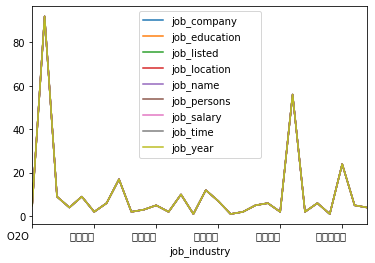

In [76]:
%matplotlib inline
import pandas as pd
import numpy as np

alg = pd.read_csv('alg.csv')
re = alg.groupby(by=['job_industry']).count()
re.plot()



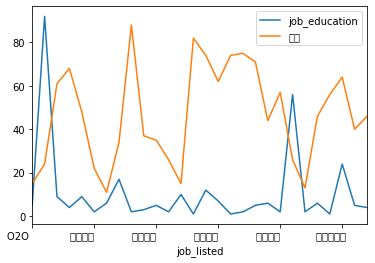

In [89]:
%matplotlib inline
import pandas as pd
import numpy as np

alg = pd.read_csv('alg.csv')
re = alg.groupby(by=['job_industry']).count()

re['job_listed'] = re.index
re['津贴'] = np.random.randint(0,100,28)
re
re.plot(x=2,y=[1,9])  #指定标签名


Text(0.5, 0, '行业分类')

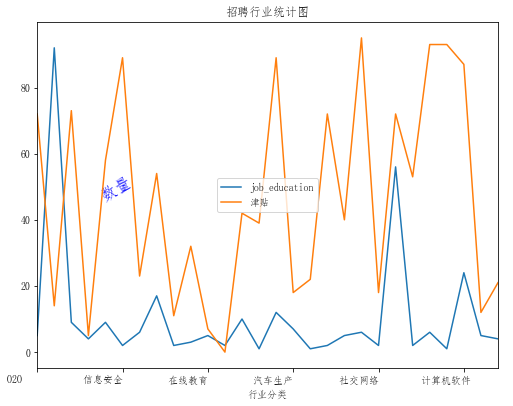

In [106]:
#坐标轴
%matplotlib inline
from pylab import mpl

mpl.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

alg = pd.read_csv('alg.csv')
re = alg.groupby(by=['job_industry']).count()

re['job_listed'] = re.index
re['津贴'] = np.random.randint(0,100,28)

#构造坐标轴
figure = plt.figure('pd可视化',figsize=(8,6))
ax = figure.add_axes([0.1,0.1,0.8,0.8])
ax.set_title('招聘行业统计图')

ax.set_ylabel('数量',labelpad=-100,fontdict={
    'color':'blue',
    'fontsize':16,
    'rotation':30
    
}) #控制间距
re.plot(x='job_listed',y=[1,9],ax=ax)
ax.set_xlabel('行业分类')

# figure.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002746CF36CF8>,
      dtype=object)

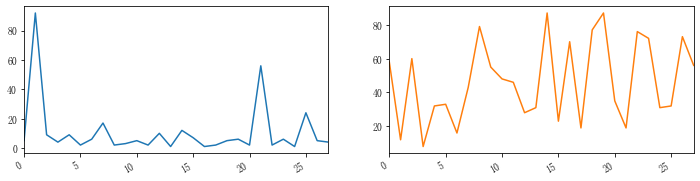

In [126]:
%matplotlib inline
from pylab import mpl

mpl.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

alg = pd.read_csv('alg.csv')
re = alg.groupby(by=['job_industry']).count()

re['job_listed'] = re.index
re['津贴'] = np.random.randint(0,100,28)


re.plot(x='job_listed',y=[1,9],legend=False,subplots=True,layout=(1,2),figsize=(12,3)  #loglog = True  刻度为指数  计算可用
       ,use_index= False) #legend主题   subplots分主题布局 layout一行两列



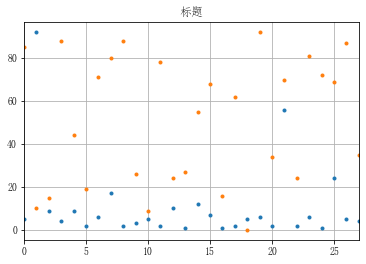

In [129]:
%matplotlib inline
from pylab import mpl

mpl.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

alg = pd.read_csv('alg.csv')
re = alg.groupby(by=['job_industry']).count()

re['job_listed'] = re.index
re['津贴'] = np.random.randint(0,100,28)


re.plot(x='job_listed',y=[1,9],legend=False,grid=True,title='标题',style='.'
       ,use_index= False) #gird 网格  subplots分主题布局 layout一行两列,style控制线条

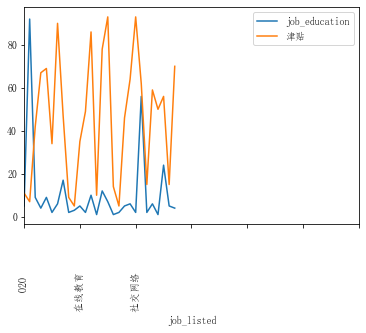

In [132]:
%matplotlib inline
from pylab import mpl

mpl.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

alg = pd.read_csv('alg.csv')
re = alg.groupby(by=['job_industry']).count()

re['job_listed'] = re.index
re['津贴'] = np.random.randint(0,100,28)


re.plot(x='job_listed',y=[1,9],xticks=[0,10,20,30,40,50,60],rot=90) #x刻度值  rot旋转度数

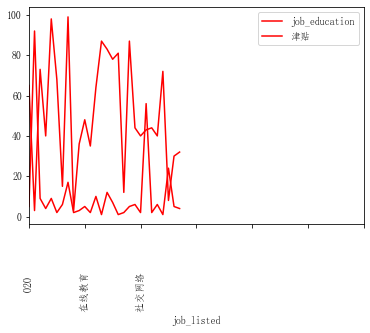

In [3]:
%matplotlib inline
from pylab import mpl
from matplotlib.colors import ListedColormap

mpl.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

alg = pd.read_csv('alg.csv')
re = alg.groupby(by=['job_industry']).count()

re['job_listed'] = re.index
re['津贴'] = np.random.randint(0,100,28)

colors = ListedColormap([1,0,0,1],[0,1,0,1])  #颜色映射
re.plot(x='job_listed',y=[1,9],xticks=[0,10,20,30,40,50,60],rot=90,colormap=colors) #x刻度值  rot旋转度数

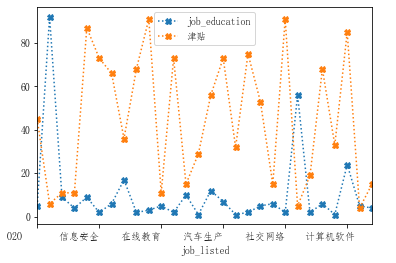

In [8]:
%matplotlib inline
from pylab import mpl
from matplotlib.colors import ListedColormap

mpl.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

alg = pd.read_csv('alg.csv')
re = alg.groupby(by=['job_industry']).count()

re['job_listed'] = re.index
re['津贴'] = np.random.randint(0,100,28)

colors = ListedColormap([1,0,0,1],[0,1,0,1])  #颜色映射
re.plot(x='job_listed',y=[1,9],linestyle=":",marker='X') #详情看marker的api  linewidth 线条像素


## bar柱状图
## area区域图
## box 箱线图
## 密度估计图
- density
- kde
## hexbin六边形图（2D直方图+频率密度图）
## hist直方图
## line曲线图（折线图）
## sacatter 散点图
## pie饼图

## area区域图¶

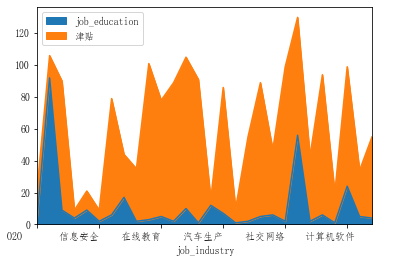

In [2]:
%matplotlib inline
from pylab import mpl
from matplotlib.colors import ListedColormap

mpl.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

alg = pd.read_csv('alg.csv')
re = alg.groupby(by=['job_industry']).count()

re['job_listed'] = re.index
re['津贴'] = np.random.randint(0,100,28)

re.plot.area(y=[1,9],stacked=True) #stacked重叠效果

## bar柱状图

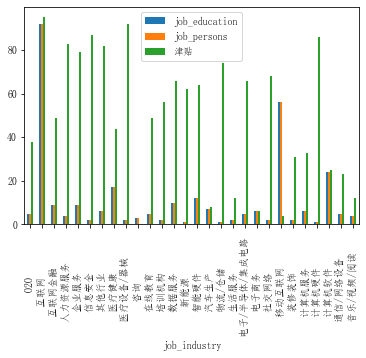

In [28]:
re.plot.bar(y=[1,5,9],stacked=False,linewidth='200')

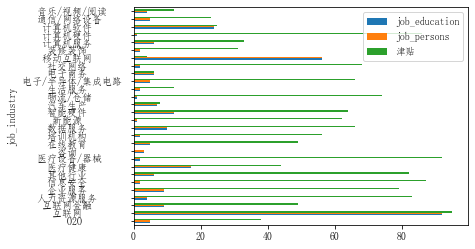

In [32]:
re.plot.barh(y=[1,5,9],stacked=False,linewidth='200')  #barh  水平柱状图

## box 箱线图
- 统计图
    - 表示的是数据的分布
        - 50%的数据在box
        - 25%数据在box下面
        - 25%数据在box上边
    - 4分位图
        - 上限   = =》上四分位数 + 1.5*（上四分位数 - 下四分位数）
        - 下限   = =》下四分位数 - 1.5*（上四分位数 - 下四分位数）
        - 离散数据  #数据超过了上下限的点
    -  5个值
        - 上下边缘
        - 中位数
        - 上下四分位数

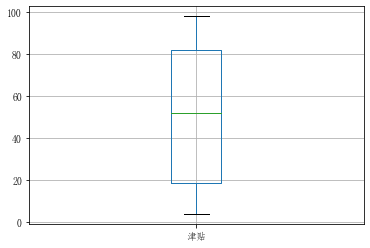

In [41]:
re.plot.box(x='job_company',y='津贴',grid=True)


In [ ]:
#  (len(data)+1)/4  ==>25%的数据在数据集内index的位置   (len(data)+1)3/4  ==>75%的数据在数据集内的位置   

## 密度估计图
    density
    
    kde

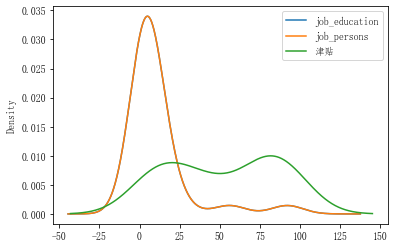

In [3]:
re.plot.density(y=[1,5,9])  

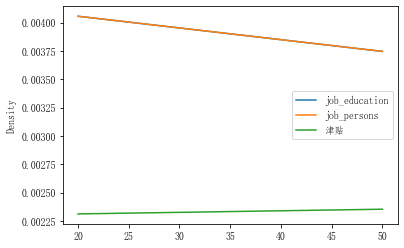

In [14]:
re.plot.kde(y=[1,5,9],bw_method=5,ind=[20,50])   #bw_method 方差的摇动值  ind需要显示的X值
#数据的每个值带入正态分布，形成概率值。高斯密度函数(中心点（均值），方差【方差】)
#把数据值，带入密度函数，得到概率【概率图】 X 原始值，Y高斯函数值

## line曲线图（折线图)

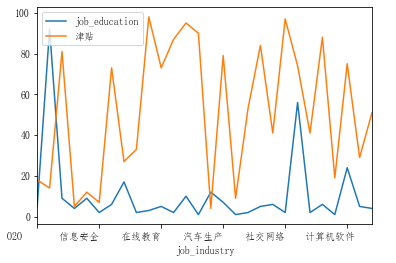

In [17]:
re.plot(y=[1,2,9])

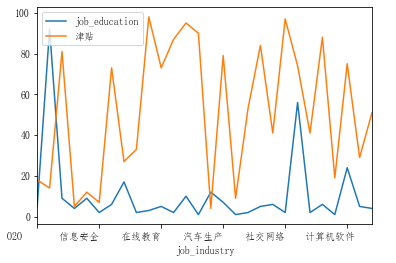

In [18]:
re.plot.line(y=[1,2,9])

In [23]:
re['job_company'].count()

28

## sacatter 散点图


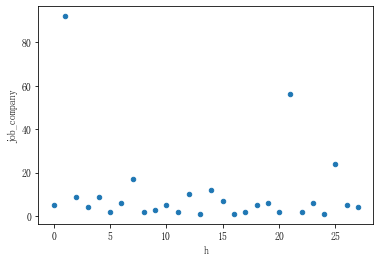

In [26]:
re['h'] = [i for i in range(0,28)]

re.plot.scatter(x='h',y='job_company')

## pie饼图

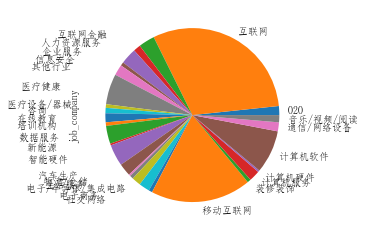

In [28]:
re.plot.pie(y='job_company',legend=False)

## hexbin六边形图（2D直方图+频率密度图）

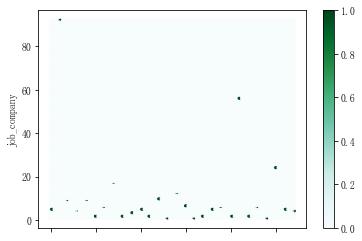

In [30]:
re['h'] = [i for i in range(0,28)]
re.plot.hexbin(x = 'h',y='job_company',legend=False)

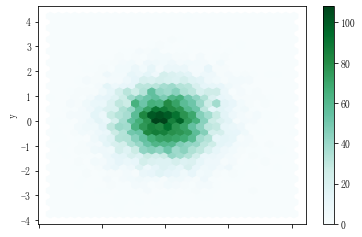

In [38]:
n = 10000
data  = pd.DataFrame(
data={
    'x':np.random.randn(n),
    'y': np.random.randn(n)
}
)
data.plot.hexbin(x='x',y='y',colorbar=True,gridsize=30)  #colrbar是旁边的柱子   gridsize

# 数据分析
- 数据分析的基础
    - 统计以及数学计算+（Excel+SQL语句）
        - 封装：Numpy 、 pandas
        - 缓存（数据处理速度） vs 数据库（服务器处理）
        - 再本地机器训练算法模型 - 》 参数 --》存储Oracle --》存储过程中实现数据分析与智能挖掘
            - sklearn
            - tensortflow
        - 数据挖掘
            - 数据清洗
            - 数据挖掘（算法）
        